# Problem Set 2, due April 26 at 3:30pm.

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on Canvas). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from Canvas. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in both years.  For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = "pobre"|
|progresa |treatment = "basal"|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|

---

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

In [1]:
# import libraries
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

In [2]:
progresa = pd.read_csv('data/progresa_sample.csv')

mean = progresa.mean()
standard_deviation = progresa.std(axis=0)

summary = pd.concat([mean, standard_deviation], axis=1).reset_index()
summary.columns = ['Name', 'Mean', 'Standard Deviation']
summary.sort_values(by='Name', ascending=True, inplace=True)
summary.drop(summary.index[[4, 16, 18]], inplace=True)
summary

,Name,Mean,Standard Deviation
14,age,11.366460,3.167744
8,dist_cap,147.674452,76.063134
3,dist_sec,2.418910,2.234109
6,fam_n,7.215715,2.352900
5,grc,3.963537,2.499063
17,grc97,3.705372,2.572387
13,hohage,44.436717,11.620372
9,hohedu,2.768104,2.656106
12,hohsex,0.925185,0.263095
10,hohwag,586.985312,788.133664


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|


In [3]:
from scipy.stats import ttest_ind

# dataframe with only poor and year 1997
poor_97_df = progresa
poor_97_df = poor_97_df[poor_97_df.year != 98]
poor_97_df = poor_97_df[poor_97_df.poor != "no pobre"]

# dataframe with treatment
treatment_df = poor_97_df[poor_97_df.progresa != "0"]
treatment_df = treatment_df.drop(['poor', 'progresa', 'year', 'folnum', 'village'], axis=1)
treatment_df = treatment_df.dropna()
treat_mean = treatment_df.mean()

# # dataframe with no treatment
no_treatment_df = poor_97_df[poor_97_df.progresa != "basal"]
no_treatment_df = no_treatment_df.drop(['poor', 'progresa', 'year', 'folnum', 'village'], axis=1)
no_treatment_df = no_treatment_df.dropna()
no_treat_mean = no_treatment_df.mean()

difference = treat_mean - no_treat_mean

columns = (progresa.columns).tolist()
columns.remove('year')
columns.remove('folnum')
columns.remove('village')
columns.remove('poor')
columns.remove('progresa')
columns
p_values = []

for c in columns:
    stat, p = ttest_ind(treatment_df[c], no_treatment_df[c], nan_policy="omit")
    p_values.append(p)

baseline = pd.DataFrame({'Name': columns, 'Average value (Treatment villages)': treat_mean, 'Average value(Control villages)': no_treat_mean, 'Difference (Treat-Control)': difference})
baseline['p-value'] = p_values
baseline.sort_values(by='Name', ascending=True, inplace=True)
baseline

,Average value (Treatment villages),Average value(Control villages),Difference (Treat-Control),Name,p-value
age,10.743825,10.785586,-0.041761,age,2.476155e-01
dist_cap,151.801472,154.492095,-2.690622,dist_cap,3.414194e-03
dist_sec,2.399648,2.400687,-0.001039,dist_sec,9.670949e-01
fam_n,7.281032,7.302939,-0.021907,fam_n,4.236088e-01
grc,3.709214,3.733653,-0.024439,grc,3.947750e-01
grc97,3.709214,3.733653,-0.024439,grc97,3.947750e-01
hohage,43.631234,44.270717,-0.639483,hohage,1.925767e-06
hohedu,2.726729,2.660982,0.065747,hohedu,2.613239e-02
hohsex,0.925586,0.923387,0.002199,hohsex,4.781232e-01
hohwag,550.207086,580.694452,-30.487366,hohwag,2.727661e-04


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline?
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

A. Some variables have statistically significant differences between treatment and control villages as baseline while others don't. The ones that have a p-value greater than .05 are: dist_sec, age, fam_n, grc, grc97, hohsex, and indig. This shows variability in the variables.

B. If there are differences at baseline, that means that the variables were different to begin with. This matters because if the variables were different to begin with, that means the differences cannot be attributed to the effects of the treatment.

C. This implies that the differences cannot be directly attributed to or impacted by the treatment because the variables were different to begin with.

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

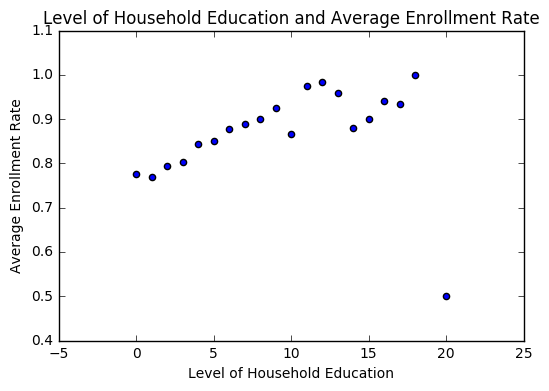

In [4]:
hohedu_97_df = pd.DataFrame(data=progresa, columns=['year', 'hohedu', 'sc'])

y = hohedu_97_df[hohedu_97_df.year != 98].groupby('hohedu').mean()['sc']

x = y.index

plt.scatter(x,y)
plt.title("Level of Household Education and Average Enrollment Rate")
plt.xlabel("Level of Household Education")
plt.ylabel("Average Enrollment Rate")
plt.show()

I notice that the more years of schooling the head of household has, the general trend is that the enrollment rate moves in a positive, almost linear direction. There is also an outlier near the 20th level which may influence linear regression results.

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). Does there appear to be a difference? Is this difference statistically significant?

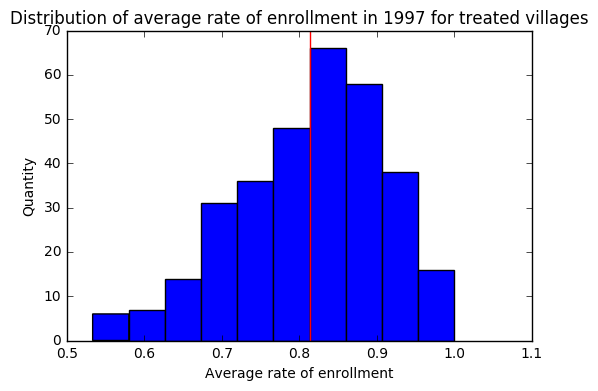

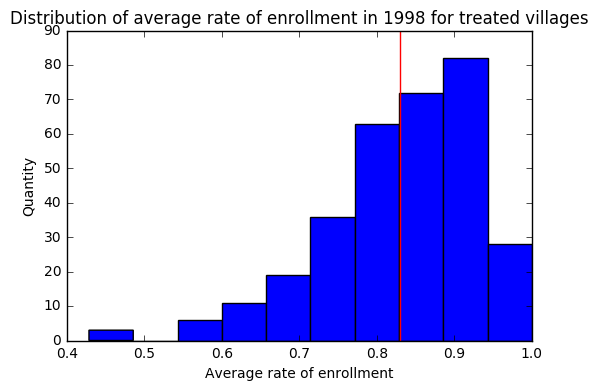

Ttest_indResult(statistic=-2.0157134865156379, pvalue=0.04424870036572115)

In [5]:
# dataframe with year 1997, poor, treatment data
poor_treat_97_df = pd.DataFrame(data=progresa, columns=['year', 'poor', 'sc', 'progresa', 'village'])
poor_treat_97_df = poor_treat_97_df[poor_treat_97_df.year !=98]
poor_treat_97_df = poor_treat_97_df[poor_treat_97_df.poor != "no pobre"]
poor_treat_97_df = poor_treat_97_df[poor_treat_97_df.progresa != "0"]
poor_treat_97_df = poor_treat_97_df.groupby("village")

# average rate of enrollment for 1997, poor, treatment data
avg_roe_97 = poor_treat_97_df.mean()['sc']

plt.hist(avg_roe_97)
plt.axvline(avg_roe_97.mean(), color = "red")
plt.title("Distribution of average rate of enrollment in 1997 for treated villages")
plt.xlabel("Average rate of enrollment")
plt.ylabel("Quantity")
plt.show()

# dataframe with year 1998, poor, control data
poor_treat_98_df = pd.DataFrame(data=progresa, columns=['year', 'poor', 'sc', 'progresa', 'village'])
poor_treat_98_df = poor_treat_98_df[poor_treat_98_df.year !=97]
poor_treat_98_df = poor_treat_98_df[poor_treat_98_df.poor != "no pobre"]
poor_treat_98_df = poor_treat_98_df[poor_treat_98_df.progresa != "0"]
poor_treat_98_df = poor_treat_98_df.groupby("village")

# average rate of enrollment for 1998, poor, control data
avg_roe_98 = poor_treat_98_df.mean()['sc']

plt.hist(avg_roe_98)
plt.axvline(avg_roe_98.mean(), color = "red")
plt.title("Distribution of average rate of enrollment in 1998 for treated villages")
plt.xlabel("Average rate of enrollment")
plt.ylabel("Quantity")
plt.show()

p = ttest_ind(avg_roe_97, avg_roe_98, nan_policy="omit")
p

There is a difference between 1997 and 1998 for the distribution of average enrollment rates. The 1998 treated villages are skewed slightly more left than the 1997 treated villages. The averages for 1997 and 1998 are similar. With a p-value of .0442, the p-value is less than .05 meaning that the results are statistically significant.

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on the poor (those with poor=='pobre'), since only the poor were eligible to receive the PROGRESA assistance.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [6]:
# dataframe with year 1998, poor, treatment data
treat_df_98 = pd.DataFrame(data=progresa, columns=['year', 'sc', 'poor', 'progresa'])
treat_df_98 = treat_df_98[treat_df_98.year !=97]
treat_df_98 = treat_df_98[treat_df_98.poor != "no pobre"]
treat_df_98 = treat_df_98[treat_df_98.progresa != "0"]

# rate of enrollment for year 1998, poor, treatment data
roe_98 = treat_df_98['sc']

# dataframe with year 1998, poor, control data
no_treat_df_98 = pd.DataFrame(data=progresa, columns=['year', 'sc', 'poor', 'progresa'])
no_treat_df_98 = no_treat_df_98[no_treat_df_98.year !=97]
no_treat_df_98 = no_treat_df_98[no_treat_df_98.poor != "no pobre"]
no_treat_df_98 = no_treat_df_98[no_treat_df_98.progresa != "basal"]

# rate of enrollment for year 1998, poor, control data
no_treat_roe_98 = no_treat_df_98['sc']

p = ttest_ind(roe_98, no_treat_roe_98, nan_policy="omit")
p

Ttest_indResult(statistic=8.3587205674183735, pvalue=6.636344447378055e-17)

The p-value is 6.63634e-17 which is extremely small, less than .05. With such a low p-value this means the results between treatment and enrollment are statistically significant.

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [7]:
from sklearn import linear_model as ln

# dataframe with year 1998, poor data
data_df_98 = pd.DataFrame(data=progresa, columns=['year', 'sc', 'poor', 'progresa'])
data_df_98 = data_df_98[data_df_98.year !=97]
data_df_98 = data_df_98[data_df_98.poor != "no pobre"]

# # convert treatment to binary
data_df_98['progresa'] = data_df_98.progresa.apply(lambda x: 1 if x == "basal" else 0)

data_df_98 = data_df_98.dropna(axis=0)

m = sm.formula.ols(formula="sc ~ progresa", data=data_df_98).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Wed, 26 Apr 2017   Prob (F-statistic):           6.64e-17
Time:                        14:41:03   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.8076      0.004    220.676      0.000         0.800     0.815
progresa       0.0388      0.005      8.359      0.000         0.030     0.048
==============================================================================
Omnibus:                     7638.939   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15767.534
Skew:                          -1.767   Prob(JB):                         0.00
Kurtosis:                       4.140   Cond. No.                         3.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. Based on the model, there is about a 4% increase in the likelihood of a child enrolling.
2. Compared to the t-test estimate from 2.1, the regression estimate is very close to the t-test estimate from 2.1. In 2.1, the p-value was 6.636344447378055e-17 which is very close to 0, the p-value for the progresa.
3. With a coefficient of .0388 we can reject the null hypothesis that the treatment effects are 0. .0388 > 0 and is not equal to 0, therefore rejecting the null hypothesis and in favor of the alternate hypothesis.
4. The counterfactual assumption is that there were differences between some of the variables to begin with.

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [8]:
m = sm.formula.ols(formula="sc ~ age + dist_sec + sex + hohedu + welfare_index + indig + progresa", data=progresa).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     3722.
Date:                Wed, 26 Apr 2017   Prob (F-statistic):               0.00
Time:                        14:47:35   Log-Likelihood:                -20571.
No. Observations:               68347   AIC:                         4.116e+04
Df Residuals:                   68339   BIC:                         4.123e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             1.4704      0.008    178.625      0.000         1.454     1.487
progresa[T.basal]     0.0202      0.003      7.834      0.000         0.015     0.025
age                  -0.0653      0.000   -154.329      0.000        -0.066    -0.064
dist_sec             -0.0112      0.001    -19.127      0.000        -0.012    -0.010
sex                   0.0331      0.003     13.210      0.000         0.028     0.038
hohedu                0.0081      0.000     16.805      0.000         0.007     0.009
welfare_index      5.219e-05   9.28e-06      5.623      0.000       3.4e-05  7.04e-05
indig                 0.0494      0.003     17.837      0.000         0.044     0.055
==============================================================================
Omnibus:                     6142.422   Durbin-Watson:                   1.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7984.754
Skew:                          -0.837   Prob(JB):                         0.00
Kurtosis:                       2.990   Cond. No.                     4.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. The controls affect the point estimate of treatment effect by .0202.
2. The controls affect the standard error on the treatment effect by .003.
3. The progresa coefficients and standard error in 2.2 and 2.3 are fairly low, showing that while the models are measuring fairly accurately, there is a weak relationship.

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate:
a) the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages
b) the difference (between 1997 and 1998) in enrollment rates among poor households in control villages.
c) The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [9]:
# dataframe with year 1997, poor, treatment
treat_df_97 = pd.DataFrame(data=progresa, columns=['year', 'sc', 'poor', 'progresa'])
treat_df_97 = treat_df_97[treat_df_97.year !=98]
treat_df_97 = treat_df_97[treat_df_97.poor != "no pobre"]
treat_df_97 = treat_df_97[treat_df_97.progresa != "0"]

# average rate of enrollment for year 1997, poor, treatment
avg_roe_97 = treat_df_97.mean()['sc']

# dataframe with year 1998, poor, treatment
treat_df_98 = pd.DataFrame(data=progresa, columns=['year', 'sc', 'poor', 'progresa'])
treat_df_98 = treat_df_98[treat_df_98.year !=97]
treat_df_98 = treat_df_98[treat_df_98.poor != "no pobre"]
treat_df_98 = treat_df_98[treat_df_98.progresa != "0"]

# average rate of enrollment for year 1998, poor, treatment
avg_roe_98 = treat_df_98.mean()['sc']

# difference between the treatment averages
treat_dif = avg_roe_98-avg_roe_97

# dataframe with year 1997, poor, control
no_treat_df_97 = pd.DataFrame(data=progresa, columns=['year', 'sc', 'poor', 'progresa'])
no_treat_df_97 = no_treat_df_97[no_treat_df_97.year !=98]
no_treat_df_97 = no_treat_df_97[no_treat_df_97.poor != "no pobre"]
no_treat_df_97 = no_treat_df_97[no_treat_df_97.progresa != "basal"]

avg_no_treat_roe_97 = no_treat_df_97.mean()['sc']

# dataframe with year 1998, poor, control
no_treat_df_98 = pd.DataFrame(data=progresa, columns=['year', 'sc', 'poor', 'progresa'])
no_treat_df_98 = no_treat_df_98[no_treat_df_98.year !=97]
no_treat_df_98 = no_treat_df_98[no_treat_df_98.poor != "no pobre"]
no_treat_df_98 = no_treat_df_98[no_treat_df_98.progresa != "basal"]

avg_no_treat_roe_98 = no_treat_df_98.mean()['sc']

# difference between the control averages
control_dif = avg_no_treat_roe_98-avg_no_treat_roe_97

# difference in difference
main_dif = treat_dif-control_dif
main_dif

0.031331280319323085

The estimate of impact is .03133 which is similar to the coefficient found in 2.2 for the relationship between Progresa and enrollment rates of the poor, treated villages (.0388). The counterfactual assumption is that the control and treatment group would be the same before treatment in 1997.

### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [10]:
mod = sm.formula.ols(formula="sc ~ progresa + year + year:progresa + age + dist_sec + sex + hohedu + welfare_index + indig", data=progresa).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     2949.
Date:                Wed, 26 Apr 2017   Prob (F-statistic):               0.00
Time:                        14:57:34   Log-Likelihood:                -20393.
No. Observations:               68347   AIC:                         4.081e+04
Df Residuals:                   68337   BIC:                         4.090e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                 -1.4162      0.395     -3.585      0.000        -2.191    -0.642
progresa[T.basal]         -2.5099      0.502     -5.003      0.000        -3.493    -1.527
year                       0.0297      0.004      7.315      0.000         0.022     0.038
year:progresa[T.basal]     0.0260      0.005      5.043      0.000         0.016     0.036
age                       -0.0660      0.000   -155.728      0.000        -0.067    -0.065
dist_sec                  -0.0113      0.001    -19.287      0.000        -0.012    -0.010
sex                        0.0331      0.002     13.270      0.000         0.028     0.038
hohedu                     0.0079      0.000     16.567      0.000         0.007     0.009
welfare_index           5.811e-05   9.26e-06      6.273      0.000         4e-05  7.63e-05
indig                      0.0491      0.003     17.789      0.000         0.044     0.055
==============================================================================
Omnibus:                     6009.585   Durbin-Watson:                   1.488
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7769.063
Skew:                          -0.826   Prob(JB):                         0.00
Kurtosis:                       2.995   Cond. No.                     3.46e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. My estimate of the impact of Progresa is .0260, meaning that there is about a 3% increase in enrollment. I focused on the interaction number of Progresa because this shows the interaction between the year and treatment.
2. Based on the simple difference, these estimates are still very close to the values in 2.2.
3. Compared to 2.4, the coefficient for year:progesa (.0260) is very close to the value found in 2.4 (.0313). Including more variables in the statistical test accounts for the differences. 2.5 allows for control variables such as age, sex, indig, etc. while 2.4 includes only year, sc, poor, and progresa.
4. The counterfactual assumption underlying this regression is that there were differences between some of the variables to begin with in the baseline.

### 2.6 Summary

* Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico? 
* Describe one other way that you might analyze these data to further investigate the causal impact of Progresa on enrollment, and clearly state the counterfactual assumption you would need to make for that approach to be valid.  *(Hint: Consider using the non-poor in your analysis)*

A. Based on the analysis, I don't think Progresa had a causal impact on the enrollment rates of poor households in Mexico. In the end enrollment increased by about 3% which is fairly low. In addition, when we look back at the baseline characteristics in the beginning, some of the variables were different to begin with, which would not lead to a fair comparison.

B. Another way I might analyze the data to further investigate the causal impact of Progesa on enrollment is by doing the same exact statistical analysis on non-poor villages. It would be important to see if similar differences were found from the baseline level and see how those differences influence the results. You could also throw out the variables that were not statistically significant and use different variables instead to potentially increase the statistical significance of the differences between the variables. The counterfactual assumption I would need to make for this approach to be valid is also have there be differences between the variables from the baseline level. That way, if the differences exist for the non-poor villages too, that might give more credibility for the treatment having impact on the villages.